In [745]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [746]:
TRAIN_DATASET_PATH = '../housing_train.csv'

In [747]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [748]:
df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,housing_median_age_nan,...,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,cluster_0,cluster_1,distance_to_center_1,distance_to_center_2
0,-1.330277,1.036473,1.025853,-1.137723,-1.348849,-0.982678,-0.978640,2.959952,452600.0,-0.189052,...,-0.560393,-0.881005,-0.704248,-0.015954,2.901549,-0.376027,1.164906,-1.164906,-1.529109,1.150787
1,-1.325291,1.027171,-0.603438,3.450773,2.196127,0.855759,1.661028,2.944799,358500.0,-0.189052,...,-0.618133,-0.881005,-0.704248,-0.015954,2.901549,-0.376027,1.164906,-1.164906,-1.548054,1.143468
2,-1.335263,1.022519,1.921963,-0.704623,-1.127515,-0.828811,-0.845613,2.280068,352100.0,-0.189052,...,-0.618366,-0.881005,-0.704248,-0.015954,2.901549,-0.376027,1.164906,-1.164906,-1.556264,1.145778
3,-1.340249,1.022519,1.921963,-0.847022,-0.964235,-0.773985,-0.736062,1.252220,341300.0,-0.189052,...,-0.410101,-0.881005,-0.704248,-0.015954,2.901549,-0.376027,1.164906,-1.164906,-1.555264,1.148171
4,-1.340249,1.022519,1.921963,-0.586572,-0.800956,-0.767795,-0.631727,0.108107,342200.0,-0.189052,...,-0.599267,-0.881005,-0.704248,-0.015954,2.901549,-0.376027,1.164906,-1.164906,-1.555264,1.148171


In [749]:
feature_names = df.columns.tolist()
feature_names.remove('median_house_value')

target_name = 'median_house_value'
feature_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'housing_median_age_nan',
 'ocean_proximity_nan',
 'longitude_outlier',
 'latitude_outlier',
 'population_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN',
 'cluster_0',
 'cluster_1',
 'distance_to_center_1',
 'distance_to_center_2']

In [750]:
X = df[feature_names]
y = df[target_name]

In [751]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [752]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

R2:	0.617
MAE:	44003.018
MSE:	3555867814.343


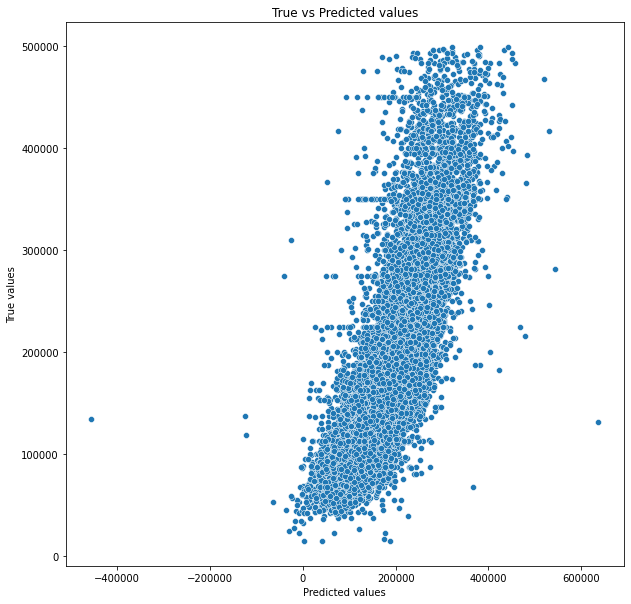

In [753]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.638
MAE:	43905.171
MSE:	3517950475.023


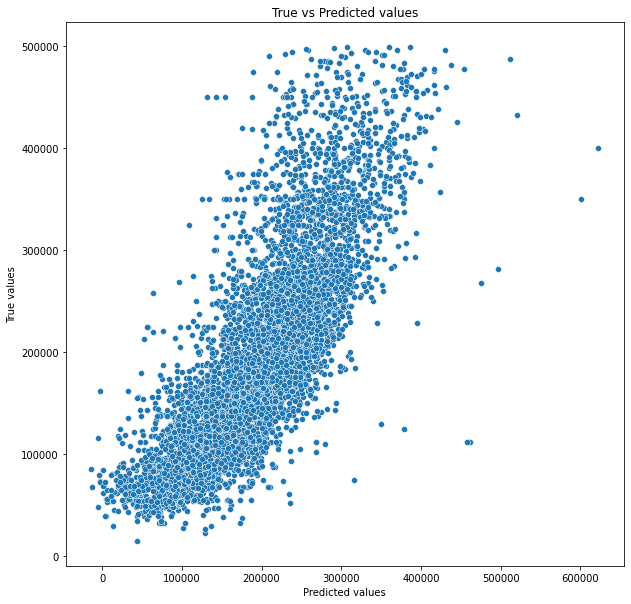

In [754]:
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [755]:
rf_model = RandomForestRegressor(max_depth=7, n_estimators=400)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=400)

R2:	0.748
MAE:	34809.171
MSE:	2341914401.468


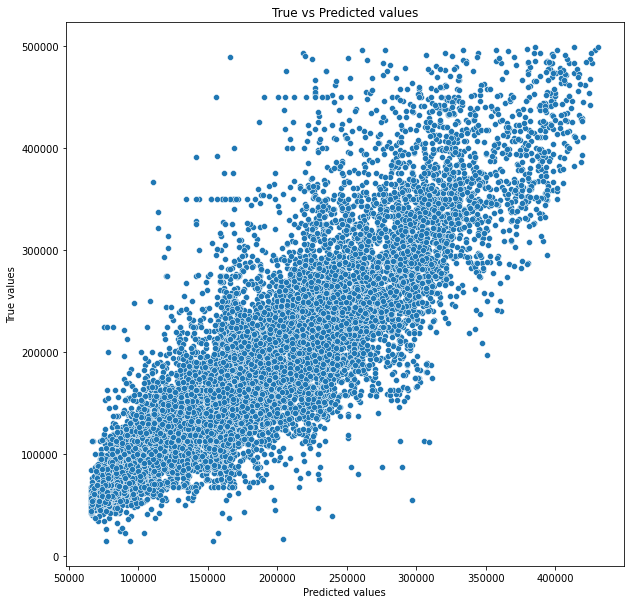

In [756]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.725
MAE:	36901.729
MSE:	2672013960.732


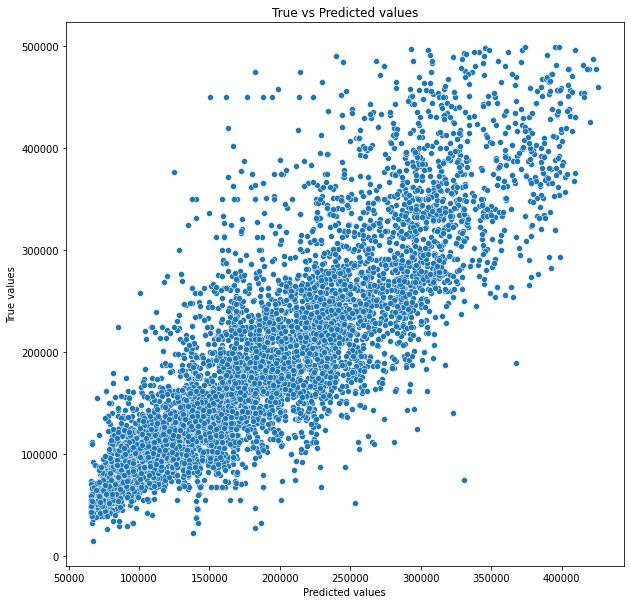

In [757]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [758]:
gb_model = GradientBoostingRegressor(max_depth=7, n_estimators=400, random_state=21)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, n_estimators=400, random_state=21)

R2:	0.977
MAE:	10973.577
MSE:	213116318.726


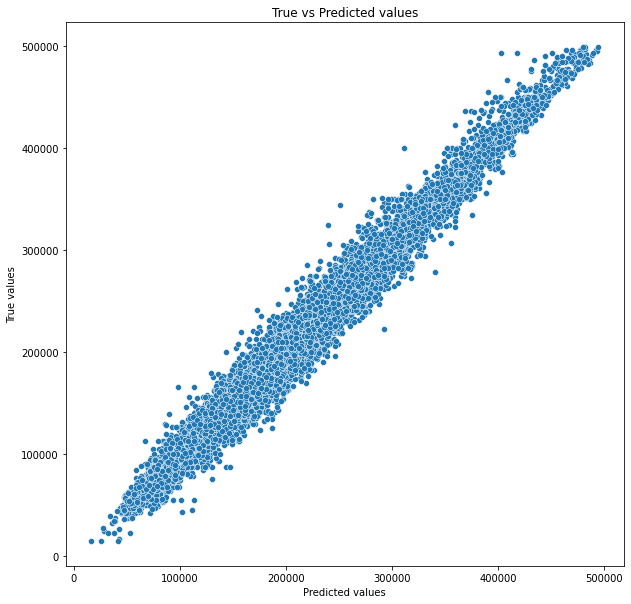

In [759]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.831
MAE:	27047.186
MSE:	1641079284.36


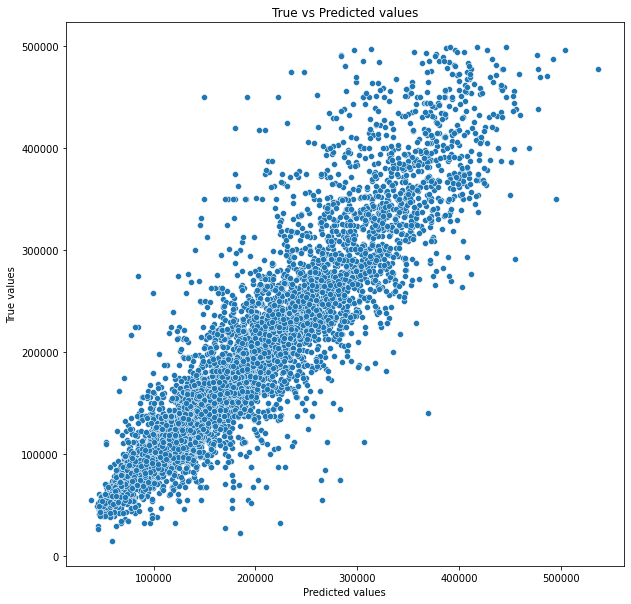

In [760]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [ ]:
# GradientBoostingRegressor даёт лучший результат так как R2 ближе к 1, а MAE и MSE меньше.